In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


2023-01-30 19:31:56.762118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_files_path = "airplanedataset/Train/"
test_files_path = "airplanedataset/Test/"

img = load_img(test_files_path + "B-52/3-1.jpg")

In [3]:
print(img_to_array(img).shape)

(230, 266, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

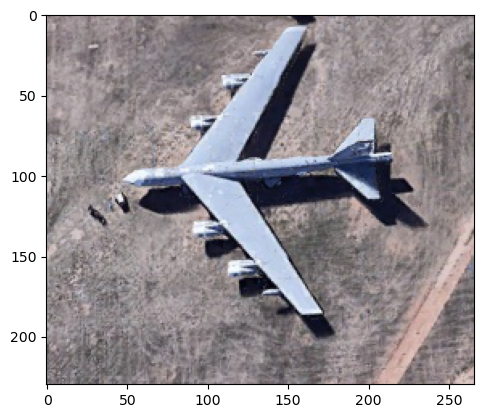

In [4]:
plt.imshow(img)
plt.show

In [5]:
train_data = ImageDataGenerator().flow_from_directory(train_files_path, target_size=(224,224))


test_data = ImageDataGenerator().flow_from_directory(test_files_path, target_size=(224,224))


Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [6]:
numberOfAirplanesTypes = 5

In [7]:
vgg = VGG16()

2023-01-30 19:32:02.306673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
vgg_layers = vgg.layers
print(vgg_layers)

[<keras.engine.input_layer.InputLayer object at 0x7ff7506b9a30>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff7506c4ca0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff7510d4f70>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff7510d41f0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff7510d49a0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff7475c4b50>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff74760cdf0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff74760ca00>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff7475c4910>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff7476138e0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff747613e20>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff747613cd0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff74761b880>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7ff74761bb80>, <keras.layers.poo

In [9]:
vggmodel_layers_tobe_used = len(vgg_layers) -1 

model = Sequential()
for i in range(vggmodel_layers_tobe_used):
    model.add(vgg_layers[i])

In [10]:
for layers in model.layers:
    layers.trainable = False
    
    
model.add(Dense(numberOfAirplanesTypes, activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [11]:
model.compile(loss= "categorical_crossentropy",
             optimizer="rmsprop",
             metrics = ["accuracy"])

In [12]:
batch_size=4
model.fit_generator(train_data,
                       steps_per_epoch=400//batch_size,
                       epochs=3,
                       validation_data=test_data,
                       validation_steps=200//batch_size)

Epoch 1/3


/var/folders/qw/d9ff247x5yd0jzxw2c2vzx880000gn/T/ipykernel_10774/4224633714.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,


100/100 [==============================] - 399s 4s/step - loss: 0.7278 - accuracy: 0.7842 - val_loss: 0.2839 - val_accuracy: 0.9100


In [14]:
img = Image.open("f22.jpg").resize((224,224))

In [16]:
img = np.array(img)

In [17]:
img.shape

(224, 224, 3)

In [18]:
print(img.ndim)

3


In [19]:
img = img.reshape(-1, 224, 224, 3)

In [20]:
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [21]:
img = preprocess_input(img)

<function matplotlib.pyplot.show(close=None, block=None)>

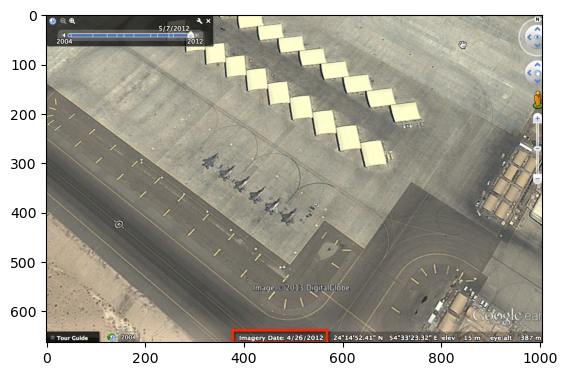

In [23]:
img_for_display = load_img("f22.jpg")
plt.imshow(img_for_display)
plt.show

In [25]:
preds = model.predict(img)

1/1 [==============================] - 1s 949ms/step


In [26]:
preds

array([[5.4020975e-02, 1.3715330e-01, 7.8383051e-03, 8.0081081e-01,
        1.7661887e-04]], dtype=float32)

In [27]:
image_classes = ["A-10 Thunderbolt", "Boeing-52", "Boeing E-3 Sentry", "F-22 Raptor", "KC-10 Extender"]

result = np.argmax(preds[0])
print(image_classes[result])

F-22 Raptor


In [28]:
img1 = Image.open("11-27.jpg").resize((224,224))


In [29]:
img1 = np.array(img1)

In [30]:
img1 = img1.reshape(-1,224,224,3)

In [31]:
img1= preprocess_input(img1)

<function matplotlib.pyplot.show(close=None, block=None)>

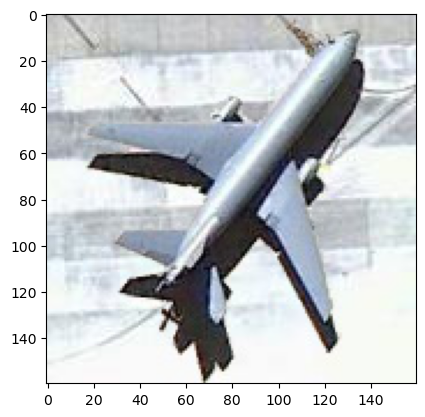

In [34]:
img_display = load_img("11-27.jpg")
plt.imshow(img_display)
plt.show

In [35]:
pred = model.predict(img1)


1/1 [==============================] - 1s 1s/step


In [36]:
pred

array([[6.7289402e-05, 3.4758943e-04, 1.5499516e-01, 1.1245240e-05,
        8.4457874e-01]], dtype=float32)

In [37]:
result1 = np.argmax(pred[0])
print(image_classes[result1])

KC-10 Extender
